<a href="https://colab.research.google.com/github/sarnavadatta/Finance-in-Python/blob/main/MACD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Build a trading strategy Moving Average Convergence/Divergence (MACD) indicator**

In [1]:
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data as pdr

In [3]:
import yfinance as yf
yf.pdr_override()

# Microsoft Stock Data
df = pdr.get_data_yahoo('MSFT', start='2023-04-28', end='2024-04-28')

[*********************100%%**********************]  1 of 1 completed


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-28,304.010010,308.929993,303.309998,307.260010,304.758789,36446700
2023-05-01,306.970001,308.600006,305.149994,305.559998,303.072601,21294100
2023-05-02,307.760010,309.179993,303.910004,305.410004,302.923798,26404400
2023-05-03,306.619995,308.609985,304.089996,304.399994,301.922058,22360800
2023-05-04,306.239990,307.760010,303.399994,305.410004,302.923798,22519900
...,...,...,...,...,...,...
2024-04-22,400.079987,402.850006,395.750000,400.959991,400.959991,20286900
2024-04-23,404.239990,408.200012,403.059998,407.570007,407.570007,15734500
2024-04-24,409.559998,412.470001,406.779999,409.059998,409.059998,15065300


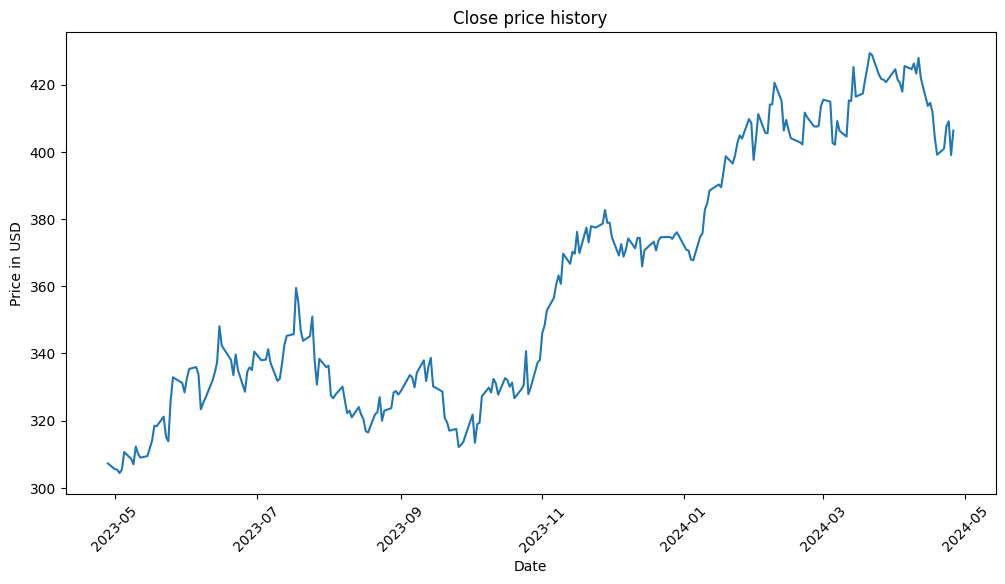

In [5]:
# visualization of Stock Price
plt.figure(figsize=(12,6))
plt.plot(df['Close'],label='Close')
plt.xticks(rotation=45)
plt.title('Close price history')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.show()

**Calculate MACD and Signal Line**

In [6]:
# Calculate short term exponential Moving average
shortEMA = df.Close.ewm(span = 12, adjust = False).mean()

# Calculate long term exponential Moving average
longEMA = df.Close.ewm(span = 26, adjust = False).mean()

# Calculate MACD line
MACD = shortEMA - longEMA

# Signal Line
signal = MACD.ewm(span=9, adjust = False).mean()

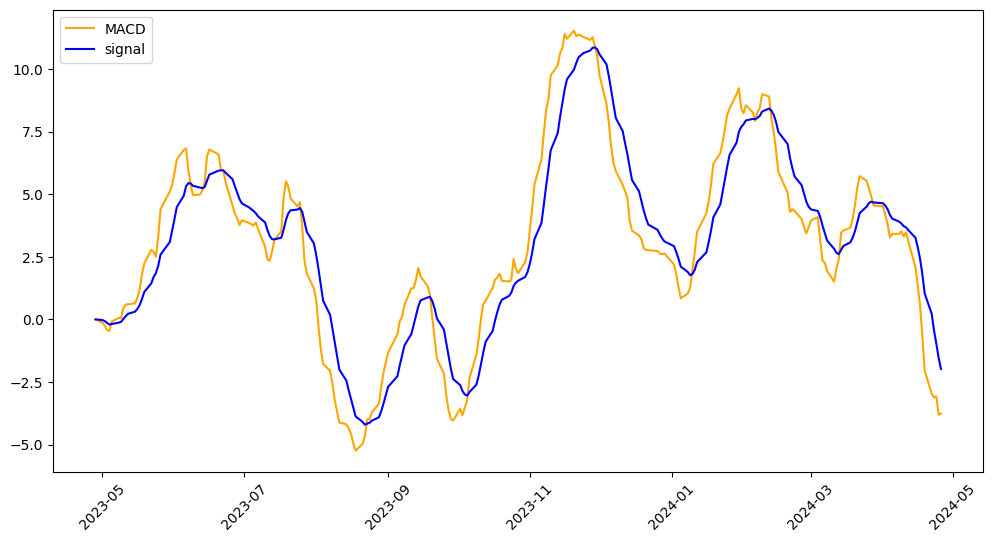

In [7]:
# visualization of MACD
plt.figure(figsize=(12,6))
plt.plot(df.index, MACD, label='MACD', color = 'orange')
plt.plot(df.index, signal, label='signal', color = 'blue')
plt.legend(loc = 'upper left')
plt.xticks(rotation=45)
plt.show()

In [8]:
df['MACD'] = MACD
df['signal'] = signal

In [9]:
# Build the trading startegy

def buy_sell_signal(data):
  buy = []
  sell = []
  flag = -1

  for i in range(0, len(data)):
    if data['MACD'][i] > data['signal'][i]:
      sell.append(np.nan)
      if flag != 1:
        buy.append(data['Close'][i])
        flag = 1
      else:
        buy.append(np.nan)

    elif data['MACD'][i] < data['signal'][i]:
      buy.append(np.nan)
      if flag != 0:
        sell.append(data['Close'][i])
        flag = 0
      else:
        sell.append(np.nan)

    else:
      buy.append(np.nan)
      sell.append(np.nan)
  return (buy, sell)

In [10]:
x = buy_sell_signal(df)
df['Buy_signal_price'] = x[0]
df['Sell_signal_price'] = x[1]

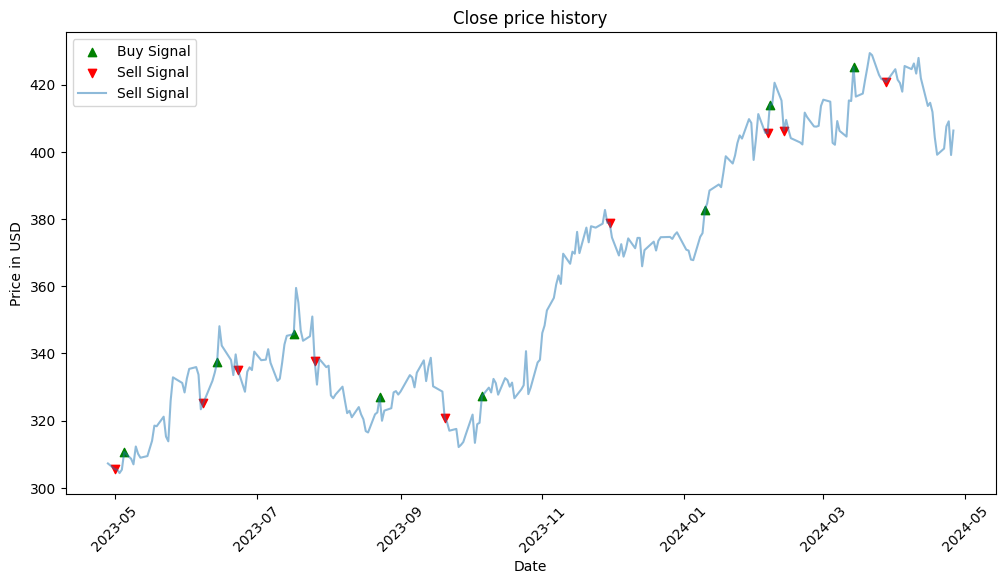

In [11]:
# visualization of MACD
plt.figure(figsize=(12,6))
plt.scatter(df.index, df['Buy_signal_price'], label='Buy Signal', color = 'green', marker= '^', alpha = 1)
plt.scatter(df.index, df['Sell_signal_price'], label='Sell Signal', color = 'red', marker= 'v', alpha = 1)
plt.plot(df['Close'], label='Sell Signal', alpha = 0.5)
plt.legend(loc = 'upper left')
plt.xticks(rotation=45)
plt.title('Close price history')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.show()